# Brief Intro about NER using Spacy

In [1]:
import spacy

Docummentation about models in Spacy https://spacy.io/models/en#en_core_web_sm

In [ ]:
!python -m spacy download en_core_web_sm

In [3]:
nlp = spacy.load("en_core_web_sm")
nlp

In [5]:
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

for token in doc:
    print("Token:",token.text, "Lemma:", token.lemma_, "POS:", token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

Token: Apple Lemma: Apple POS: PROPN NNP nsubj Xxxxx True False
Token: is Lemma: be POS: AUX VBZ aux xx True True
Token: looking Lemma: look POS: VERB VBG ROOT xxxx True False
Token: at Lemma: at POS: ADP IN prep xx True True
Token: buying Lemma: buy POS: VERB VBG pcomp xxxx True False
Token: U.K. Lemma: U.K. POS: PROPN NNP dobj X.X. False False
Token: startup Lemma: startup POS: NOUN NN dep xxxx True False
Token: for Lemma: for POS: ADP IN prep xxx True True
Token: $ Lemma: $ POS: SYM $ quantmod $ False False
Token: 1 Lemma: 1 POS: NUM CD compound d False False
Token: billion Lemma: billion POS: NUM CD pobj xxxx True False


In [6]:
doc1 = nlp("Victor Marie Hugo was a French poet, playwright, novelist, statesman and human rights activist.")

In [7]:
doc1

Victor Marie Hugo was a French poet, playwright, novelist, statesman and human rights activist.

In [22]:
doc2 = nlp("Pablo Ruiz Picasso was a Spanish painter, sculptor, printmaker, ceramicist, and theatre designer who spent most of his adult life in France.")

In [13]:
doc2

Pablo Picasso was a Spanish painter, sculptor, printmaker, ceramicist, and theatre designer who spent most of his adult life in France.

In [10]:
from spacy import displacy
displacy.render(doc1, style="ent", jupyter=True)

In [23]:
displacy.render(doc2, style="ent", jupyter=True)

## NER in Spacy



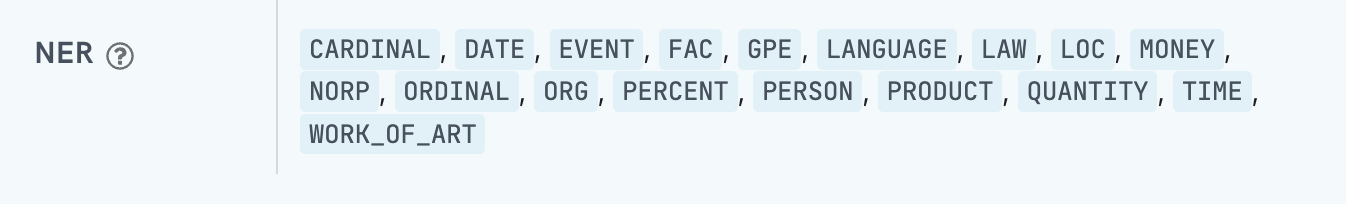



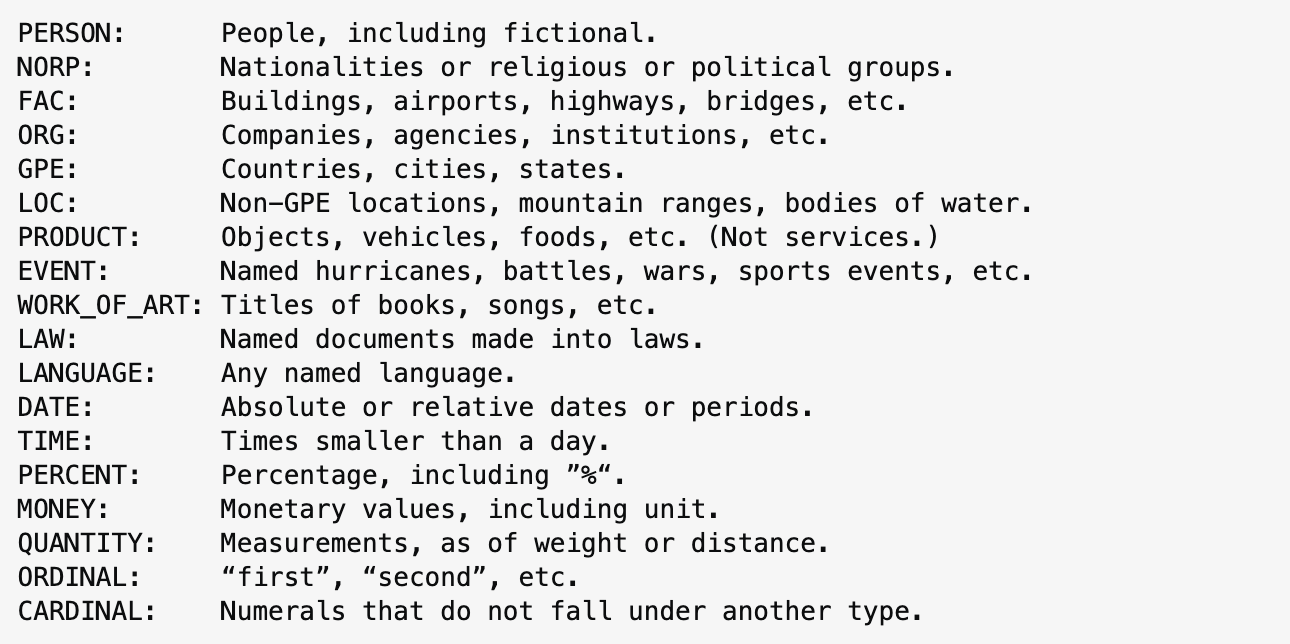

# Building Custom Named Entity Recognition Model Using Spacy

In [ ]:
!python -m spacy download en_core_web_lg

In [16]:
nlp = spacy.load("en_core_web_lg")
nlp

In [17]:
doc = nlp("Pablo Ruiz Picasso was a Spanish painter, sculptor, printmaker, ceramicist, and theatre designer who spent most of his adult life in France.")

In [18]:
doc

Pablo Ruiz Picasso was a Spanish painter, sculptor, printmaker, ceramicist, and theatre designer who spent most of his adult life in France.

In [19]:
type(doc)

spacy.tokens.doc.Doc

In [20]:
doc.ents

(Pablo Ruiz Picasso, Spanish, France)

In [ ]:
doc.ents[0], type(doc.ents[0])

(Pablo Ruiz Picasso, spacy.tokens.span.Span)

In [21]:
from spacy import displacy
displacy.render(doc, style="ent", jupyter=True)

## Custom NER for Medical texts

In [24]:
import json
# https://www.kaggle.com/datasets/finalepoch/medical-ner
with open('/content/Medical_NER.json', 'r') as f:
    data = json.load(f)

In [25]:
data['examples'][0].keys()

dict_keys(['id', 'content', 'metadata', 'annotations', 'classifications'])

In [26]:
data['examples'][0]['content']

"While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]"

In [27]:
data['examples'][0]['annotations'][0]

{'id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed',
 'tag_id': 'c06bd022-6ded-44a5-8d90-f17685bb85a1',
 'end': 371,
 'start': 360,
 'example_id': '18c2f619-f102-452f-ab81-d26f7e283ffe',
 'tag_name': 'Medicine',
 'value': 'Diosmectite',
 'correct': None,
 'human_annotations': [{'timestamp': '2020-03-21T00:24:32.098000Z',
   'annotator_id': 1,
   'tagged_token_id': '0825a1bf-6a6e-4fa2-be77-8d104701eaed',
   'name': 'Ashpat123',
   'reason': 'exploration'}],
 'model_annotations': []}

Formatting the given dataset (data) into a specific structure (training_data) that is suitable for training a Named Entity Recognition (NER) model that is suitable for spaCy.





```
# The suitable spacy data look like this:

TRAIN_DATA = [
    ("Text of the first document", {"entities": [(start, end, "LABEL1"), ...]}),
    ("Text of the second document", {"entities": [(start, end, "LABEL2"), ...]}),
    # and so on...
]

```




In [28]:
# Initialize an empty list to store the training data
training_data = []

# Iterate over each example in the provided data
for example in data['examples']:
    # Create a temporary dictionary to hold the text and entities for each example
    temp_dict = {
        'text': example['content'],  # Store the text of the example
        'entities': []  # Initialize an empty list to store entities
    }

    # Iterate over each annotation in the current example
    for annotation in example['annotations']:
        # Extract the start and end positions of the entity, and its label
        start = annotation['start']
        end = annotation['end']
        label = annotation['tag_name'].upper()  # Convert label to uppercase

        # Append the entity information as a tuple to the entities list
        temp_dict['entities'].append((start, end, label))

    # Add the prepared dictionary to the training data list
    training_data.append(temp_dict)

# Print the first entry of the formatted training data to verify the structure
print(training_data[0])

{'text': "While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.[92]\n\nDiosmectite, a natural aluminomagnesium silicate clay, is effective in alleviating symptoms of acute diarrhea in children,[93] and also has some effects in chronic functional diarrhea, radiation-induced diarrhea, and chemotherapy-induced diarrhea.[45] Another absorbent agent used for the treatment of mild diarrhea is kaopectate.\n\nRacecadotril an antisecretory medication may be used to treat diarrhea in children and adults.[86] It has better tolerability than loperamide, as it causes less constipation and flatulence.[94]", 'entities': [(360, 371, 'MEDICINE'), (383, 408, 'MEDICINE'), (104, 112, 'MEDICALCONDITION'), (679,

In [29]:
training_data[11]['text']

"Although the vast majority of bacteria are harmless or beneficial to one's body, a few pathogenic bacteria can cause infectious diseases. The most common bacterial disease is tuberculosis, caused by the bacterium Mycobacterium tuberculosis, which affects about 2 million people mostly in sub-Saharan Africa. Pathogenic bacteria contribute to other globally important diseases, such as pneumonia, which can be caused by bacteria such as Streptococcus and Pseudomonas, and foodborne illnesses, which can be caused by bacteria such as Shigella, Campylobacter, and Salmonella. Pathogenic bacteria also cause infections such as tetanus, typhoid fever, diphtheria, syphilis, and Hansen's disease. They typically range between 1 and 5 micrometers in length."

In [30]:
training_data[11]['entities']

[(659, 667, 'MEDICALCONDITION'),
 (436, 449, 'PATHOGEN'),
 (673, 689, 'MEDICALCONDITION'),
 (30, 38, 'PATHOGEN'),
 (454, 465, 'PATHOGEN'),
 (647, 657, 'MEDICALCONDITION'),
 (87, 106, 'PATHOGEN'),
 (542, 554, 'MEDICALCONDITION'),
 (532, 540, 'PATHOGEN'),
 (30, 39, 'PATHOGEN'),
 (561, 571, 'PATHOGEN'),
 (623, 630, 'MEDICALCONDITION'),
 (471, 490, 'MEDICALCONDITION'),
 (632, 645, 'MEDICALCONDITION'),
 (542, 555, 'PATHOGEN'),
 (648, 667, 'MEDICALCONDITION')]

In [32]:
training_data[11]['text'][659:667]

'syphilis'

In [33]:
# Import necessary libraries
from spacy.tokens import DocBin  # For efficient binary serialization of Doc objects
from tqdm import tqdm  # For displaying progress bars during long-running operations

# Load a new blank spaCy model for the English language
nlp = spacy.blank("en")

# Initialize a DocBin object
# DocBin is used for efficient binary serialization of spaCy's Doc objects
# It's particularly useful for creating training data for spaCy models
doc_bin = DocBin()


* A new, blank spaCy model for English (spacy.blank("en")) is created and assigned to nlp. This model is 'blank' meaning it doesn't include components like a tagger or parser by default, making it faster for operations where those components aren't needed.

* A DocBin instance is initialized. This will be used to store Doc objects (representations of processed text) efficiently. The DocBin format is often used when saving processed documents for training data, ensuring compact storage and fast loading times.

 ### Preparing training data for a Named Entity Recognition (NER) model in spaCy. It involves creating Doc objects from the training data, handling entity annotations, filtering overlapping entities, and finally serializing the processed documents into a binary file for efficient storage and training purposes.

In [34]:
# Import necessary functions from spaCy
from spacy.util import filter_spans
from tqdm import tqdm

# Initialize the spaCy model
nlp = spacy.blank("en") # Create a blank English model

# Initialize the DocBin object for efficient storage of Doc objects
doc_bin = DocBin()

# Process each training example
for training_example in tqdm(training_data):
    # Extract text and entity labels from the training example
    text = training_example['text']
    labels = training_example['entities']

    # Create a Doc object from the text without running the full pipeline
    doc = nlp.make_doc(text)

    # Initialize an empty list to store entity spans
    ents = []

    # Iterate over the entities in the training example
    for start, end, label in labels:
        # Create a span for each entity
        span = doc.char_span(start, end, label=label, alignment_mode="contract")

        # If the span is valid, add it to the list of entities
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)

    # Filter overlapping spans to ensure each token is part of at most one entity
    filtered_ents = filter_spans(ents)

    # Assign the filtered entities to the document
    doc.ents = filtered_ents

    # Add the processed document to the DocBin
    doc_bin.add(doc)

# Save the DocBin with the processed documents to disk
doc_bin.to_disk("train.spacy")


100%|██████████| 31/31 [00:00<00:00, 314.98it/s]

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity


### Initializing the training configuration:
https://spacy.io/usage/training#quickstart



1.   Create/download the base_confiq.cfg from https://spacy.io/usage/training#quickstart and select language, component, and all the required setting (e.g. NER, accuracy)
2.   Generate a detailed training configuration file (config.cfg) based on a template or basic configuration file (base_config.cfg). This detailed configuration file is then used for training spaCy models, ensuring that all necessary settings and parameters are properly defined.



In [35]:
!python -m spacy init fill-config base_config.cfg config.cfg

2024-01-29 14:28:36.462269: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 14:28:36.462347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 14:28:36.464952: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 14:28:38.531405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


### Training the custom NER

In machine learning, max_epochs is like deciding how many times SpaCy will read the "storybook" (the training data).
Each "epoch" is one complete reading of the storybook from start to end. So, max_epochs tells SpaCy how many times to read through all the training data.

For this tutorial set the batch size to be 100 and max_epochs in [training] to be 30. --- the default value is 0: a default value of 0 often means that the training will continue until another stopping condition is met. These conditions could be things like not getting much better at understanding the story (the model isn't improving), or it might be based on other settings or criteria.

In [42]:
!python -m spacy train config.cfg --output ./ --paths.train ./train.spacy --paths.dev ./train.spacy

2024-01-29 15:14:28.029265: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 15:14:28.029348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 15:14:28.031668: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 15:14:29.508357: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['to

**Interprating the training results:**


Interpreting the output of a custom Named Entity Recognition (NER) model in spaCy involves understanding various metrics and values that are typically displayed during the training process. Let's break down each part of the output you provided, which appears to be from the training log:

1. **E**: This stands for "Epoch". An epoch is one complete pass through the entire training dataset. If you see "E 5", it means SpaCy is on its 5th round of reading through all its books (training data).

2. **#**: This is the batch number. In each epoch, the training data is divided into smaller sets or "batches". This number shows which batch SpaCy is currently learning from in the epoch.

3. **LOSS TOK2VEC**: This is the training loss for the "tok2vec" component of the model. Loss measures how well SpaCy is doing at understanding the words in its current batch. A lower loss means it's doing better. If it's too high, SpaCy might be having trouble.

4. **LOSS NER**: This is the training loss specifically for the NER part. It tells you how well SpaCy is doing at finding and understanding the special names or things (entities) in the text. Like with tok2vec, a lower number is better.

5. **ENTS_F**: This is the F-score for entity recognition. It's a number between 0 and 1 that measures how accurate SpaCy is at finding the right entities. It's a mix of precision and recall (which are explained next). Closer to 1 means SpaCy is really good at it!

6. **ENTS_P**: This is the Precision score for entities. It tells you what percentage of the entities SpaCy found were actually correct. If SpaCy is too eager and marks too many things as entities, this number might go down.

7. **ENTS_R**: This is the Recall score for entities. It measures what percentage of the actual entities in the text SpaCy managed to find. If SpaCy is too cautious and misses some entities, this number might be low.

8. **SCORE**: This is usually the overall score of the model, often based on the F-score. It gives you a quick idea of how well the model is performing. Higher is better.

When you're training SpaCy, you want to see the LOSS TOK2VEC and LOSS NER go down over time as it learns. At the same time, you want the ENTS_F, ENTS_P, and ENTS_R to go up, showing that SpaCy is getting better at finding and understanding the right entities in the text. It's like watching SpaCy get smarter and better at reading with each epoch and each batch!

In spaCy, after you train a Named Entity Recognition (NER) model, you often end up with two versions of the model: model-last and model-best.

In summary, model-last is the model as it was at the end of the last training epoch, while model-best is the version that had the best performance on the validation data during training. Depending on your needs, you might choose to deploy model-best for its potentially superior performance on unseen data.

In [38]:
nlp_ner = spacy.load("model-best")

In [39]:
# Intitalize the colours for the NER

colors = {"PATHOGEN": "#F67DE3", "MEDICINE": "#7DF6D9", "MEDICALCONDITION":"#a6e22d"}
options = {"colors": colors}

In [40]:
doc = nlp_ner("Although the vast majority of bacteria are harmless or beneficial to one's body, a few pathogenic bacteria can cause infectious diseases. The most common bacterial disease is tuberculosis, caused by the bacterium Mycobacterium tuberculosis, which affects about 2 million people mostly in sub-Saharan Africa. Pathogenic bacteria contribute to other globally important diseases, such as pneumonia, which can be caused by bacteria such as Streptococcus and Pseudomonas, and foodborne illnesses, which can be caused by bacteria such as Shigella, Campylobacter, and Salmonella. Pathogenic bacteria also cause infections such as tetanus, typhoid fever, diphtheria, syphilis, and Hansen's disease. They typically range between 1 and 5 micrometers in length.")

spacy.displacy.render(doc, style="ent", options= options, jupyter=True)

In [41]:
doc = nlp_ner("While bismuth compounds (Pepto-Bismol) decreased the number of bowel movements in those with travelers' diarrhea, they do not decrease the length of illness.[91] Anti-motility agents like loperamide are also effective at reducing the number of stools but not the duration of disease.[8] These agents should be used only if bloody diarrhea is not present.")
spacy.displacy.render(doc, style="ent", options= options, jupyter=True)